In [1]:
import numpy as np
import pandas as pd 
import random
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets_830916_1419436_drug200.csv', delimiter=',')

In [3]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# Converted into numeric value

In [6]:
data['Sex'].replace('F', 0, inplace = True)
data['Sex'].replace('M', 1, inplace = True)
data['BP'].replace('HIGH', 0, inplace = True)
data['BP'].replace('LOW', 1, inplace = True)
data['BP'].replace('NORMAL', 2, inplace = True)
data['Cholesterol'].replace('NORMAL', 0, inplace = True)
data['Cholesterol'].replace('HIGH', 1, inplace = True)

In [7]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,1,25.355,DrugY
1,47,1,1,1,13.093,drugC
2,47,1,1,1,10.114,drugC
3,28,0,2,1,7.798,drugX
4,61,0,1,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,1,11.567,drugC
196,16,1,1,1,12.006,drugC
197,52,1,2,1,9.894,drugX
198,23,1,2,0,14.020,drugX


# Normalized Ratio Columns

In [8]:
def normalize(data):
    data.Age = (data.Age-data.Age.mean(axis=0))/data.Age.std(axis=0)
    data.Na_to_K = (data.Na_to_K-data.Na_to_K.mean(axis=0))/data.Na_to_K.std(axis=0)
    return data


In [9]:
data_norm = normalize(data)

In [10]:
X = data_norm[['Age','Sex','Cholesterol','BP','Na_to_K']]
y = data_norm[['Drug']]

In [11]:
# extract y from data
y_label = 'Drug';

y =data[y_label];


y_index = data.columns.get_loc(y_label)
# extract features from data
X = data.iloc[:,:y_index]

In [12]:
m, n = X.shape
idx = np.arange(0,m)

# Partion data into training and testing dataset
random.shuffle(idx)
data = data.iloc[idx,:]
data = data.reset_index()
data = data.drop(['index'],axis=1)
percent_train = 0.7
m_train = int(m*percent_train)

X_train = data.iloc[0:m_train,0:y_index];
X_test = data.iloc[m_train:,0:y_index];

y_train = data.iloc[:m_train,y_index];
y_test = data.iloc[m_train:,y_index];
labels = pd.unique(data[y_label])

# Encode target labels as integers 0..k-1

i = 0
for label in y.unique():
    y_train[y_train.str.match(label)] = str(i)
    y_test[y_test.str.match(label)] = str(i)
    i = i + 1      
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [13]:
def phi(i, theta, X):
    mat_theta = np.matrix(theta[i])
    mat_x = np.matrix(X)
    num = math.exp(np.dot(mat_theta,mat_x.T))
    den = 0
    for j in range(0,k):
        mat_theta_j = np.matrix(theta[j])
        den = den + math.exp(np.dot(mat_theta_j,mat_x.T))
    phi_i = num/den
    return phi_i

In [14]:
def indicator(i, j):
    if i == j: return 1
    else: return 0

def grad_cost(X_train, y_train, j, theta):
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y_train[i], j) - phi(j, theta,X_train.loc[i])
        sum = sum + (X_train.loc[i] * p)
    grad = -sum/m
    return grad

def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iters):
    j_history = []
    j_history1 =[] 
    for iter in range(iters):
        for j in range(0, k):
            theta[j] = theta[j] - alpha * grad_cost(X_train, y_train, j, theta)
            j_history_train = J(X_train,y_train,theta)
            j_history_test = J(X_test,y_test,theta)
            j_history.append(j_history_train)
            j_history1.append(j_history_test)
    return theta,j_history,j_history1

def h(X, theta):
    X = np.matrix(X)
    h_matrix = np.empty((k,1))
    den = 0
    for j in range(0,k):
        den = den + math.exp(np.dot(theta[j], X.T))
    for i in range(0,k):
        h_matrix[i] = math.exp(np.dot(theta[i],X.T))
    h_matrix = h_matrix/den
    return h_matrix

def J(X,y,theta):
    cost=0
    m,n=X.shape
    k,n=theta.shape
    for i in range(m):
        for j in range(k):
            cost += indicator(y.iloc[i], j)*math.log(phi(j,theta,X.iloc[i]))
    return -cost/m


In [17]:
# k is the number of unique labels

k = len(y.unique())

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)
    
if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)
    

# Reset m and n for training data

m, n = X_train.shape

# Initialize theta for each class  

theta_initial = np.ones((k,n))

alpha = .1
iterations = 100

# Logistic regression

theta,j_history,j_history1 = gradient_descent(X_train,y_train,X_test,y_test,theta_initial, alpha, iterations)

print(theta)

[[1.74269306 0.83346954 1.2916671  1.32993028 1.23971559 2.64663701]
 [0.6662709  1.16257894 0.85229782 0.96111912 1.1711924  0.7203556 ]
 [0.84508531 0.69465784 0.93241161 1.9985172  0.58286685 0.339573  ]
 [0.91823751 0.6793285  0.96383815 0.36392741 1.15153758 0.58656278]
 [0.85397851 1.62211707 0.97313495 0.37405793 0.86852806 0.72592695]]


Theta optimized: [[1.74269306 0.83346954 1.2916671  1.32993028 1.23971559 2.64663701]
 [0.6662709  1.16257894 0.85229782 0.96111912 1.1711924  0.7203556 ]
 [0.84508531 0.69465784 0.93241161 1.9985172  0.58286685 0.339573  ]
 [0.91823751 0.6793285  0.96383815 0.36392741 1.15153758 0.58656278]
 [0.85397851 1.62211707 0.97313495 0.37405793 0.86852806 0.72592695]]
Cost with optimized theta: 0.6416973511003916


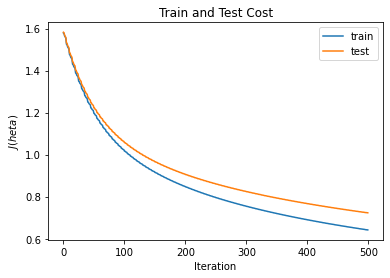

In [23]:
print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

plt.plot(j_history,label='train')
plt.plot(j_history1,label='test')
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Train and Test Cost")
plt.legend()
plt.show()

In [24]:
# Predicting classes on test data 

if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)

# Reset m and n for test data

m,n = X_test.shape

y_pred = []
for index,row in X_test.iterrows():
    h_matrix = h(row, theta)
    prediction = int(np.where(h_matrix == h_matrix.max())[0])
    y_pred.append(prediction)
        
# Estimate accuracy of model on test data        

correct = (y_pred == y_test).value_counts()[True]
accuracy = correct/m
print('Accuracy: %.4f' % accuracy)


Accuracy: 0.7500
